In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
rcParams['figure.figsize']=10,6

from pandas import set_option
#set_option('precision',5)
pd.options.display.float_format = '{:.5f}'.format

#### Source of the data: https://finance.yahoo.com/quote/GC%3DF/history?period1=1293840000&period2=1591747200&interval=1d&filter=history&frequency=1d

In [2]:
#dataset = pd.read_csv('yahoostocks.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)
dataset = pd.read_csv('GoldPrize.csv',index_col='Date',parse_dates=True,infer_datetime_format=True)

In [3]:
dataset.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-01-03,1415.59998,1423.90002,1413.69995,1422.59998,1422.59998,54.00000
2011-01-04,1409.59998,1410.90002,1375.80005,1378.50000,1378.50000,28.00000
2011-01-05,1383.40002,1384.00000,1364.19995,1373.40002,1373.40002,122.00000
2011-01-06,1374.80005,1376.50000,1368.90002,1371.40002,1371.40002,175.00000
2011-01-07,1372.69995,1377.19995,1355.50000,1368.50000,1368.50000,158.00000
2011-01-09,nan,nan,nan,nan,nan,nan
2011-01-10,1369.00000,1374.00000,1365.69995,1373.69995,1373.69995,225.00000
2011-01-11,1375.40002,1384.50000,1373.90002,1384.00000,1384.00000,181.00000
2011-01-12,1382.59998,1385.50000,1378.00000,1385.69995,1385.69995,13.00000


In [4]:
# check for the null values
dataset['Close'].dropna(inplace=True)
dataset.describe(include = 'all')

#dataset['Close'].dropna(inplace=True) 

,Open,High,Low,Close,Adj Close,Volume
count,2373.00000,2373.00000,2373.00000,2373.00000,2373.00000,2373.00000
mean,1375.87122,1382.96127,1368.11635,1375.68862,1375.68862,2097516.32280
std,188.54428,190.58497,185.85117,188.44132,188.44132,15026919.12584
min,1053.69995,1062.00000,1046.19995,1050.80005,1050.80005,0.00000
25%,1238.40002,1243.90002,1231.80005,1238.30005,1238.30005,36.00000
50%,1310.69995,1315.59998,1306.09998,1310.69995,1310.69995,138.00000
75%,1525.00000,1533.09998,1514.69995,1524.50000,1524.50000,500.00000
max,1909.00000,1911.59998,1864.00000,1888.69995,1888.69995,230724452.00000


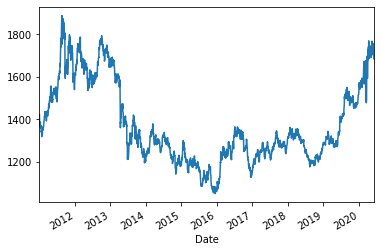

In [5]:
dataset['Close'].plot(kind='line')

#### Here we ca see that there is trend(upward and downward) assign with the data and some seasonality is also present.
#### Lets apply LSTM moel to the data for predictions - Deep learning.

In [6]:
data = dataset.filter(['Close'])
data.dropna(inplace=True)
data.isna().any()
#data

Close    False
dtype: bool

##### we nee to convert data into range of 0 to 1 for passing as an input to LSTM

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [8]:
data_scaled = scaler.fit_transform(np.array(data).reshape(-1,1))
datalen = int((len(data)*0.7))

train_data_scaled = data_scaled[0:datalen]
test_data_scaled = data_scaled[datalen:]

In [9]:
train_data_scaled.shape, test_data_scaled.shape,len(data)

((1661, 1), (712, 1), 2373)

In [10]:
#creating a method for testing the data
def create_train_test_data(data,time_step=90):
    X_data, Y_data = [],[]
    for i in range(len(data) - time_step - 1):
        a = data[i:(i+time_step),0]
        b = data[i+time_step,0]
        X_data.append(a)
        Y_data.append(b)
    return np.array(X_data) , np.array(Y_data)

In [11]:
print(train_data_scaled[3:103],train_data_scaled[103])
print(train_data_scaled[99:102])

[[0.38262324]
 [0.37916218]
 [0.38536811]
 [0.39766081]
 [0.39968963]
 [0.40112187]
 [0.36949518]
 [0.37868476]
 [0.381191  ]
 [0.35290606]
 [0.34634203]
 [0.35051914]
 [0.33595898]
 [0.33679435]
 [0.31936986]
 [0.34598393]
 [0.33774917]
 [0.34467116]
 [0.33500416]
 [0.35982818]
 [0.35505434]
 [0.35421883]
 [0.37307556]
 [0.37474643]
 [0.37128537]
 [0.36889845]
 [0.37450765]
 [0.38524879]
 [0.38656157]
 [0.39849617]
 [0.40267328]
 [0.4173529 ]
 [0.43274856]
 [0.43501616]
 [0.42713921]
 [0.4278554 ]
 [0.45339533]
 [0.46115282]
 [0.43585153]
 [0.45041168]
 [0.45745312]
 [0.44886027]
 [0.4517246 ]
 [0.43131632]
 [0.44241556]
 [0.44611525]
 [0.40792453]
 [0.41198233]
 [0.42153001]
 [0.43573221]
 [0.44802476]
 [0.44957632]
 [0.46198833]
 [0.45828863]
 [0.44790544]
 [0.44038673]
 [0.43585153]
 [0.44516057]
 [0.46318179]
 [0.45029236]
 [0.45518552]
 [0.47857745]
 [0.48561875]
 [0.48657358]
 [0.50435616]
 [0.4971954 ]
 [0.47989023]
 [0.48227715]
 [0.50232719]
 [0.51855836]
 [0.52691258]
 [0.52

In [12]:
time_step = 100
X_train, Y_train = create_train_test_data(train_data_scaled,time_step)
X_test, Y_test = create_train_test_data(test_data_scaled,time_step)

In [13]:
X_train.shape,Y_train.shape

((1560, 100), (1560,))

In [14]:
X_test.shape,Y_test.shape

((611, 100), (611,))

In [15]:
# before implementing LSTM model we need to change our shape into 3-D
X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1], 1)

In [16]:
X_train.shape,X_test.shape

((1560, 100, 1), (611, 100, 1))

In [17]:
#pip install tensorflow
(X_train.shape[1],1)

(100, 1)

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [84]:
# creating a stacked LSTM model for prediction
model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences = True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50,activation='relu',return_sequences = True))
model.add(LSTM(50,activation='relu'))
#model.add(Dense(25))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [85]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_20 (LSTM)               (None, 100, 50)           10400     
_________________________________________________________________
lstm_21 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_22 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [86]:
# now fitting the model

model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs = 100, batch_size = 64,verbose =2)

Epoch 1/100
25/25 - 4s - loss: 0.0800 - val_loss: 0.0124
Epoch 2/100
25/25 - 3s - loss: 0.0073 - val_loss: 0.0023
Epoch 3/100
25/25 - 3s - loss: 0.0038 - val_loss: 0.0020
Epoch 4/100
25/25 - 3s - loss: 0.0031 - val_loss: 0.0016
Epoch 5/100
25/25 - 3s - loss: 0.0026 - val_loss: 0.0014
Epoch 6/100
25/25 - 3s - loss: 0.0022 - val_loss: 0.0019
Epoch 7/100
25/25 - 3s - loss: 0.0020 - val_loss: 0.0016
Epoch 8/100
25/25 - 3s - loss: 0.0019 - val_loss: 0.0013
Epoch 9/100
25/25 - 3s - loss: 0.0017 - val_loss: 0.0016
Epoch 10/100
25/25 - 3s - loss: 0.0018 - val_loss: 0.0012
Epoch 11/100
25/25 - 3s - loss: 0.0016 - val_loss: 0.0012
Epoch 12/100
25/25 - 3s - loss: 0.0015 - val_loss: 0.0013
Epoch 13/100
25/25 - 3s - loss: 0.0015 - val_loss: 0.0011
Epoch 14/100
25/25 - 3s - loss: 0.0014 - val_loss: 0.0012
Epoch 15/100
25/25 - 3s - loss: 0.0014 - val_loss: 0.0011
Epoch 16/100
25/25 - 3s - loss: 0.0014 - val_loss: 0.0011
Epoch 17/100
25/25 - 3s - loss: 0.0013 - val_loss: 0.0013
Epoch 18/100
25/25 - 3s

In [87]:
# prediction
train_predict_scaled = model.predict(X_train)
test_predict_scaled = model.predict(X_test)

In [88]:
# transform the data into original form 
# note: we have converted the data using minmaxscalar
train_predict = scaler.inverse_transform(train_predict_scaled)
test_predict = scaler.inverse_transform(test_predict_scaled)

In [89]:
# checking model performance
from sklearn.metrics import mean_squared_error,r2_score
print("Training MSE: ", mean_squared_error(Y_train,train_predict))
print("Training RMSE: ", np.sqrt(mean_squared_error(Y_train,train_predict)))
print()
print("Testing MSE: ", mean_squared_error(Y_test,test_predict))
print("Testing RMSE: ", np.sqrt(mean_squared_error(Y_test,test_predict)))

Training MSE:  1905194.158258857
Training RMSE:  1380.2877085082143

Testing MSE:  1957323.32487068
Testing RMSE:  1399.043717998362


In [219]:
trainPredictedPlot = np.empty_like(data_scaled)
trainPredictedPlot[:,:] = np.nan
trainPredictedPlot

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]])

In [220]:
len(train_predict)+(look_back*2)+1,len(train_predict)+look_back

(1761, 1660)

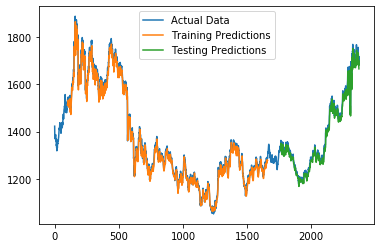

In [62]:
look_back = 100
# shift train predictions for plotting
trainPredictedPlot = np.empty_like(data_scaled)
trainPredictedPlot[:,:] = np.nan
trainPredictedPlot[look_back:len(train_predict)+look_back,:] = train_predict

# shift test predictions for plotting
testPredictedPlot = np.empty_like(data_scaled)
testPredictedPlot[:,:] = np.nan
testPredictedPlot[len(train_predict)+(look_back*2)+1:len(data_scaled)-1,:] = test_predict
# plotting graph
plt.plot(scaler.inverse_transform(data_scaled),label = 'Actual Data')
plt.plot(trainPredictedPlot,label = 'Training Predictions')
plt.plot(testPredictedPlot,label='Testing Predictions')
plt.legend(loc='best')
plt.show()

In [222]:
#plt.plot(pd.Series(data),label = 'Actual Data')
#plt.plot(pd.Series(scaler.inverse_transform(train_data).reshape(len(train_data)),index = data[0:int((len(data)*0.8))].index),label = 'Train Data')
#plt.plot(pd.Series(scaler.inverse_transform(test_data).reshape(len(test_data)),index = data[int((len(data)*0.8)):].index),label = 'Test Data')
#plt.legend(loc='best')
#plt.show()

In [57]:
train = data[0:datalen+time_step]
valid = data[datalen+time_step+1:]
valid['Predicted'] = test_predict

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


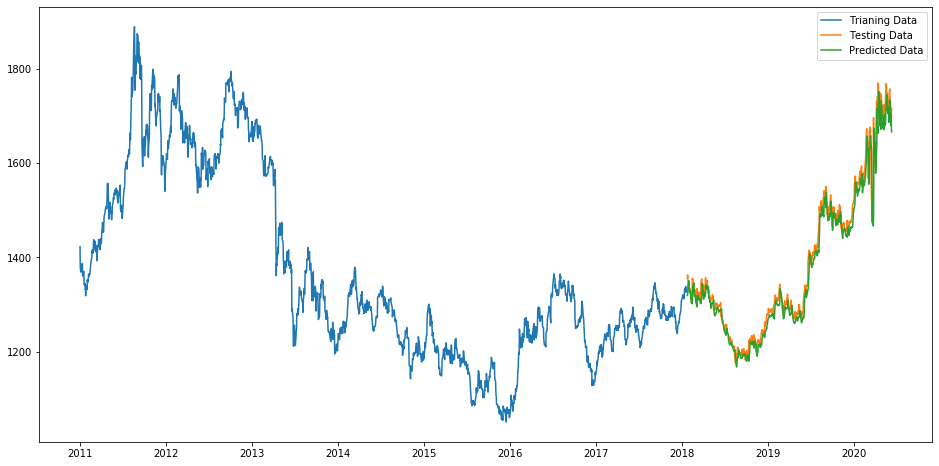

In [58]:
plt.figure(figsize=(16,8))
plt.plot(train,label='Trianing Data')
plt.plot(valid['Close'],label='Testing Data')
plt.plot(valid['Predicted'],label='Predicted Data')
plt.legend(loc='best')
plt.show()

In [225]:
valid

,Close,Predicted
Date,,
2018-01-24,1355.90002,1330.04199
2018-01-25,1362.40002,1333.58655
2018-01-26,1351.59998,1349.47607
2018-01-30,1335.40002,1362.19202
2018-01-31,1339.00000,1357.99707
...,...,...
2020-06-04,1719.80005,1732.22986
2020-06-05,1688.59998,1701.28442
2020-06-07,1684.09998,1725.28467


In [63]:
len(test_data_scaled)

712

In [64]:
x_input = test_data_scaled[len(test_data_scaled)-100:].reshape(1,-1)
#x_input[0].tolist()
x_input.shape

(1, 100)

In [65]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [66]:
len(temp_input)

100

In [67]:
lst_output = []
n_steps = 100
i=0

while(i<30):
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1,x_input.shape[1],1))
        yhat = model.predict(x_input)
        lst_output.extend(yhat.tolist())
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        i = i+1
        
    else:
        x_input = x_input.reshape((1,x_input.shape[1],1))
        yhat = model.predict(x_input)
        lst_output.extend(yhat.tolist())
        temp_input.extend(yhat[0].tolist())
        i = i+1

In [68]:
dt_new = np.arange(1,101)
dt_pred = np.arange(101,131)
#dt_pred = np.arange(101,101+365)

In [69]:
len(test_data_scaled)

712

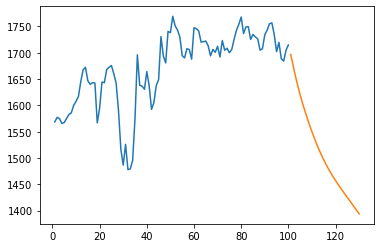

In [70]:
plt.plot(dt_new,scaler.inverse_transform(test_data_scaled[len(test_data_scaled)-100:]))
plt.plot(dt_pred,scaler.inverse_transform(lst_output))

In [234]:
#len(dfdata)

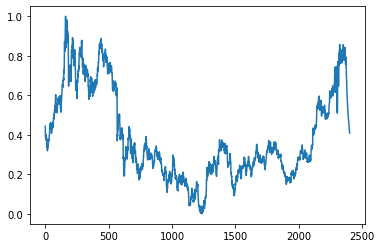

In [71]:
dfdata = data_scaled.tolist()
dfdata.extend(lst_output)
plt.plot(dfdata[:])